$$Introduction$$

$$Data Description$$

$$Pre-Registration Statement$$

$$Data Analysis$$

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import poisson, ttest_ind

In [5]:
recycling_2010 = pd.read_csv('recycling_2010.csv')
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [6]:
recycling_2016 = pd.read_csv('recycling_2016.csv')
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,Brooklyn,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,Brooklyn,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,Brooklyn,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,Brooklyn,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,Brooklyn,BKN05,1,2016,July,9.1,23.5,33.0,27.9


In [8]:
biking_2013 = pd.read_csv('biking_2013.csv')
biking_2013.head()

,Unnamed: 0,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
1,15,1.0,40.7,-74.01,252005,672,2013-06-18 20:57:05,2013-06-18 21:08:17,337,Old Slip & Front St,263.0,Elizabeth St & Hester St,40.717591,-73.996224,18669,Subscriber,1972.0,1
2,20,1.0,40.7,-74.01,146704,1543,2013-06-12 19:47:24,2013-06-12 20:13:07,427,Bus Slip & State St,363.0,West Thames St,40.708347,-74.017134,15363,Subscriber,1960.0,1
3,25,1.0,40.7,-74.01,6636,1395,2013-06-01 19:08:28,2013-06-01 19:31:43,304,Broadway & Battery Pl,401.0,Allen St & Rivington St,40.720196,-73.989978,19213,Subscriber,1982.0,1
4,30,1.0,40.7,-74.01,213635,311,2013-06-16 17:39:59,2013-06-16 17:45:10,534,Water - Whitehall Plaza,465.0,Broadway & W 41 St,40.755136,-73.986580,16027,Subscriber,1980.0,1


In [7]:
biking_2016 = pd.read_csv('biking_2016.csv')
biking_2016.head()

,Unnamed: 0,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,1.0,40.75,-73.99,1242409,641,6/26/2016 18:19:17,6/26/2016 18:29:59,498,Broadway & W 32 St,528,2 Ave & E 31 St,40.742909,-73.977061,25678,Subscriber,1993.0,1
1,2,1.0,40.75,-73.99,742387,184,6/16/2016 19:32:46,6/16/2016 19:35:50,492,W 33 St & 7 Ave,446,W 24 St & 7 Ave,40.744876,-73.995299,15870,Subscriber,1969.0,1
2,4,1.0,40.75,-73.99,1363324,918,6/29/2016 09:27:01,6/29/2016 09:42:20,533,Broadway & W 39 St,168,W 18 St & 6 Ave,40.739713,-73.994564,20817,Subscriber,1988.0,2
3,6,1.0,40.75,-73.99,583701,614,6/13/2016 18:39:02,6/13/2016 18:49:17,379,W 31 St & 7 Ave,475,E 16 St & Irving Pl,40.735243,-73.987586,19640,Subscriber,1970.0,1
4,8,1.0,40.75,-73.99,1320796,236,6/28/2016 13:19:09,6/28/2016 13:23:05,533,Broadway & W 39 St,498,Broadway & W 32 St,40.748549,-73.988084,16735,Subscriber,1960.0,1


In [9]:
ghg_ny = pd.read_csv('ghg_ny.csv')
ghg_ny.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,industy_subparts,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,C,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,CTT,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89
2,2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,...,D,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61
3,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,CD,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83
4,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,CD,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68


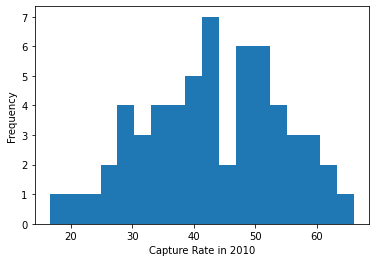

In [10]:
##Histogram for 2010
plt.hist(recycling_2010["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2010")
plt.ylabel("Frequency")
plt.show()

In [11]:
## Average Capture Rate for 2010
mean_2010 = round(recycling_2010[["Capture Rate"]].mean(),2)
draws_2010 = np.random.poisson(mean_2010, 1000)

In [12]:
print("Mean Capture Rate for 2010: ", mean_2010)

Mean Capture Rate for 2010:  Capture Rate    43.22
dtype: float64


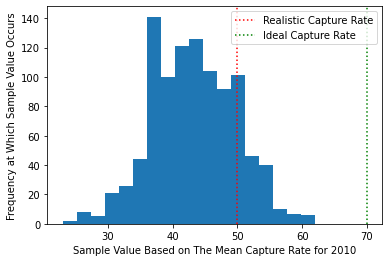

In [13]:
## Histogram for draws_2010
plt.hist(draws_2010, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2010")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [14]:
## Probability of Capturing 50% in 2010
rate50_2010 = round(float(poisson.sf(50, mean_2010)*100),4)
print("probability of capturing more than 50% of recycled waste: "+ str(rate50_2010)+"%")

probability of capturing more than 50% of recycled waste: 13.501%


In [15]:
## Probability of Capturing 70% in 2010
rate70_2010 = round(float(poisson.sf(70, mean_2010)*100),4)
print("probability of capturing more than 70% of recycled waste: "+ str(rate70_2010)+"%")

probability of capturing more than 70% of recycled waste: 0.0066%


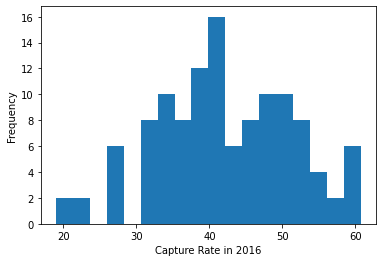

In [16]:
##Histogram for 2016
plt.hist(recycling_2016["Capture Rate"], bins=18)
plt.xlabel("Capture Rate in 2016")
plt.ylabel("Frequency")
plt.show()

In [17]:
## Average Capture Rate for 2016
mean_2016 = round(recycling_2016[["Capture Rate"]].mean(),2)
draws_2016 = np.random.poisson(mean_2016, 1000)

In [18]:
print("Mean Capture Rate for 2016: ", mean_2016)

Mean Capture Rate for 2016:  Capture Rate    42.02
dtype: float64


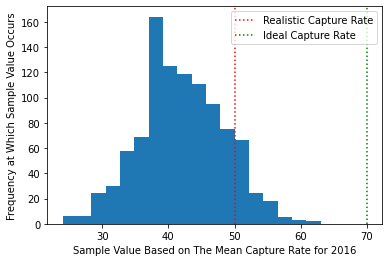

In [19]:
## Histogram for draws_2016
plt.hist(draws_2016, bins=18)
plt.xlabel("Sample Value Based on The Mean Capture Rate for 2016")
plt.ylabel("Frequency at Which Sample Value Occurs")
plt.axvline(color='r', linestyle="dotted", x=50, label="Realistic Capture Rate")
plt.axvline(color='g', linestyle="dotted", x=70, label="Ideal Capture Rate")
plt.legend(loc="upper right")
plt.show()

In [20]:
## Probability of Capturing 50% in 2016
rate50_2016 = round(float(poisson.sf(50, mean_2016)*100),4)
print("probability of capturing more than 50% of recycled waste: "+ str(rate50_2016)+"%")

probability of capturing more than 50% of recycled waste: 9.8094%


In [21]:
## Probability of Capturing 70% in 2016
rate70_2016 = round(float(poisson.sf(70, mean_2016)*100),4)
print("probability of capturing more than 70% of recycled waste: "+ str(rate70_2016)+"%")

probability of capturing more than 70% of recycled waste: 0.0029%


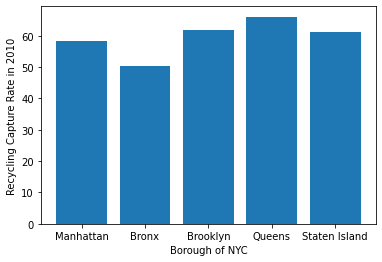

In [31]:
plt.bar(recycling_2010["Zone"], recycling_2010["Capture Rate"])
plt.xlabel('Borough of NYC')
plt.ylabel('Recycling Capture Rate in 2010')
plt.show()

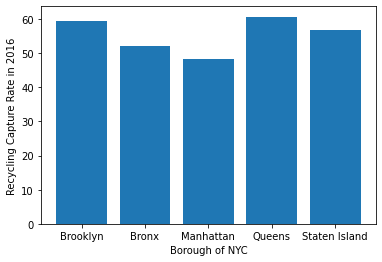

In [32]:
plt.bar(recycling_2016["Zone"], recycling_2016["Capture Rate"])
plt.xlabel('Borough of NYC')
plt.ylabel('Recycling Capture Rate in 2016')
plt.show()

In [42]:
boro_counts_2013 = pd.DataFrame(biking_2013["Zone"].value_counts())
boro_counts_2013 = boro_counts_2013.rename(columns={"Zone":"boro_counts"})
boro_counts_2013["Zone"] = ["Manhattan", "Brooklyn"]
boro_counts_2013.head()

,boro_counts,Zone
1.0,710,Manhattan
3.0,93,Brooklyn


In [43]:
boro_counts_2016 = pd.DataFrame(biking_2016["Zone"].value_counts())
boro_counts_2016 = boro_counts_2016.rename(columns={"Zone":"boro_counts"})
boro_counts_2016["Zone"] = ["Manhattan", "Brooklyn","Queens"]
boro_counts_2016.head()

,boro_counts,Zone
1.0,709,Manhattan
3.0,79,Brooklyn
4.0,10,Queens


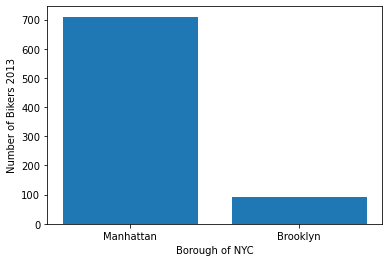

In [44]:
plt.bar(boro_counts_2013["Zone"], boro_counts_2013["boro_counts"])
plt.xlabel('Borough of NYC')
plt.ylabel('Number of Bikers 2013')
plt.show()

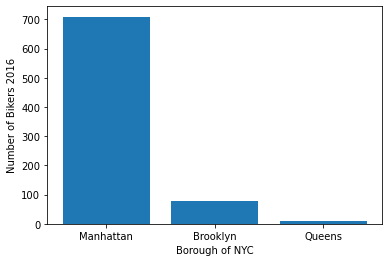

In [45]:
plt.bar(boro_counts_2016["Zone"], boro_counts_2016["boro_counts"])
plt.xlabel('Borough of NYC')
plt.ylabel('Number of Bikers 2016')
plt.show()

In [76]:
year = 2013
total_sums = np.zeros(6)
for i in range(6):
    year_str = str(year)
    total_sums[i] = ghg_ny[year_str].sum()
    year = year+1
total_sums = pd.DataFrame(total_sums)
total_sums["total_pollution"] = total_sums
total_sums["Year"] = ["2013", "2014", "2015", "2016", "2017", "2018"]
total_sums = total_sums[["Year", "total_pollution"]]
total_sums["biker_counts"] = [618572, 1035478, 941117, 1460303, 1731155, 1952950]
print("The sum of pollution levels for each year from 2011-2018: ")
total_sums.head()

The sum of pollution levels for each year from 2011-2018: 


,Year,total_pollution,biker_counts
0,2013,39270240.62,618572
1,2014,39988530.62,1035478
2,2015,39958269.61,941117
3,2016,37066181.97,1460303
4,2017,31824056.02,1731155


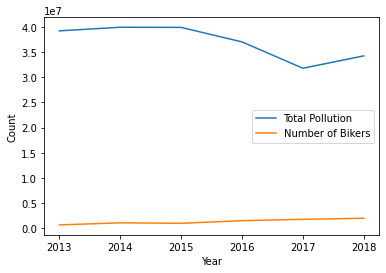

In [81]:
plt.plot(total_sums['Year'], total_sums["total_pollution"], label="Total Pollution")
plt.plot(total_sums['Year'], total_sums["biker_counts"], label="Number of Bikers")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

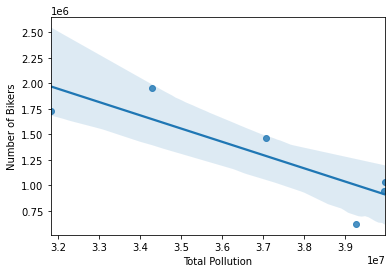

In [84]:
sns.regplot(x='total_pollution', y="biker_counts", data=total_sums)
plt.xlabel("Total Pollution")
plt.ylabel("Number of Bikers")
plt.show()

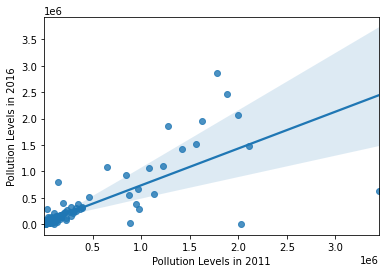

In [106]:
sns.regplot(x="2011", y="2016", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

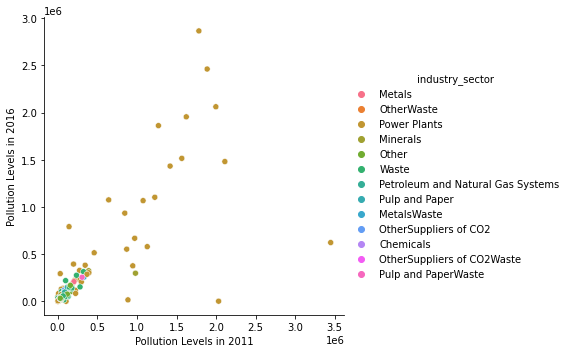

In [105]:
sns.relplot(x="2011", y="2016", hue="industry_sector", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

In [129]:
ghg_ny["industry_sector"].value_counts()

Power Plants                         76
Waste                                36
Other                                32
Minerals                              9
Petroleum and Natural Gas Systems     7
Metals                                6
Pulp and Paper                        5
Chemicals                             2
OtherSuppliers of CO2                 2
MetalsWaste                           1
OtherWaste                            1
OtherSuppliers of CO2Waste            1
Pulp and PaperWaste                   1
Name: industry_sector, dtype: int64

In [127]:
## initialize a KMeans object
clustering = KMeans(n_clusters = 3, random_state = 15)

## perform the KMeans algorithm on the penguins_clean bill and flipper length data
clustering.fit(ghg_ny[["2011", "2018"]])

##finding the cluster centers
clustering.cluster_centers_

array([[  87235.63477987,   81408.68408805],
       [1961293.7075    , 1737516.9175    ],
       [1085828.21666667,  620179.6375    ]])

In [130]:
ghg_ny.describe()

,Unnamed: 0,facility_id,frs_id,zip_code,latitude,longitude,naics_code,2018,2017,2016,2015,2014,2013,2012,2011
count,179.000000,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,89.000000,1.003555e+06,1.100140e+11,12451.111732,42.093296,-75.122123,375564.335196,1.915434e+05,1.777880e+05,2.070736e+05,2.232306e+05,2.233996e+05,2.193868e+05,2.355143e+05,2.379372e+05
std,51.816986,2.837565e+03,1.773127e+07,1431.822975,1.196583,1.883042,169157.430534,4.008765e+05,3.672045e+05,4.352217e+05,4.522830e+05,4.422304e+05,4.238308e+05,4.724936e+05,4.838693e+05
min,0.000000,1.000077e+06,1.100003e+11,10009.000000,40.560000,-79.350000,221112.000000,3.240500e+02,1.090000e+01,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.810000e+01
25%,44.500000,1.001194e+06,1.100008e+11,11235.500000,40.810000,-76.490000,221112.000000,3.103041e+04,2.838040e+04,3.090339e+04,3.199285e+04,3.056397e+04,3.260268e+04,3.516281e+04,3.573856e+04
50%,89.000000,1.002843e+06,1.100072e+11,12188.000000,42.290000,-74.000000,325211.000000,6.236400e+04,5.526479e+04,6.144747e+04,6.907765e+04,7.016813e+04,6.718341e+04,6.539170e+04,6.747830e+04
75%,133.500000,1.005860e+06,1.100197e+11,13665.500000,43.035000,-73.775000,562212.000000,1.252133e+05,1.330378e+05,1.397206e+05,1.507080e+05,1.535405e+05,1.470076e+05,1.479933e+05,1.519051e+05
max,178.000000,1.011742e+06,1.100701e+11,14903.000000,44.990000,-72.870000,928110.000000,2.584176e+06,2.311840e+06,2.865681e+06,2.643762e+06,2.570292e+06,2.274036e+06,2.585287e+06,3.449007e+06


In [131]:
cluster_labels = clustering.labels_
cluster_labels[0:5]

array([0, 0, 1, 0, 0], dtype=int32)

In [132]:
ghg_ny['cluster_label'] = cluster_labels
ghg_ny.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,industry_sector,2018,2017,2016,2015,2014,2013,2012,2011,cluster_label
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,Metals,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73,0
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,OtherWaste,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89,0
2,2,1000101,110019468057,Athens Generating Company,ATHENS,NY,12015,9300 U S HIGHWAY 9W,Greene,42.27,...,Power Plants,1381328.03,1487213.14,1514867.54,1285191.24,1026373.20,1376177.50,2133936.99,1566947.61,1
3,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,Power Plants,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83,0
4,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,Power Plants,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68,0


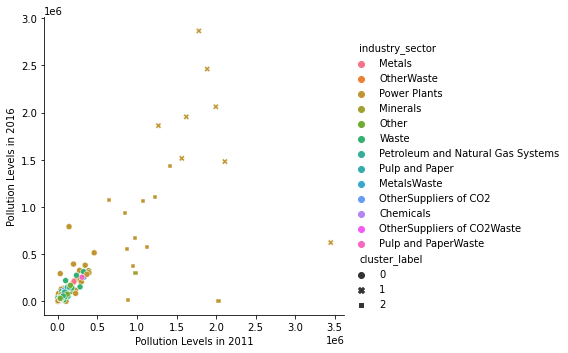

In [134]:
sns.relplot(x="2011", y="2016", hue="industry_sector", style="cluster_label", data=ghg_ny)
plt.xlabel("Pollution Levels in 2011")
plt.ylabel("Pollution Levels in 2016")
plt.show()

In [202]:
top_pollutors = pd.DataFrame()
top_pollutors["counts_2012"] = ghg_ny.groupby("city")["2012"].sum().nlargest(3)
top_pollutors["counts_2011"] = ghg_ny.groupby("city")["2011"].sum()
top_pollutors["counts_2013"] = ghg_ny.groupby("city")["2013"].sum()
top_pollutors["counts_2014"] = ghg_ny.groupby("city")["2014"].sum()
top_pollutors["counts_2015"] = ghg_ny.groupby("city")["2015"].sum()
top_pollutors["counts_2016"] = ghg_ny.groupby("city")["2016"].sum()
top_pollutors["counts_2017"] = ghg_ny.groupby("city")["2017"].sum()
top_pollutors["counts_2018"] = ghg_ny.groupby("city")["2018"].sum()
top_pollutors.head()

,counts_2012,counts_2011,counts_2013,counts_2014,counts_2015,counts_2016,counts_2017,counts_2018
city,,,,,,,,
ASTORIA,4764387.02,4042716.00,4380823.02,4675385.27,4466886.67,4155855.99,3778604.39,4217072.28
NEW YORK,2622599.36,2735569.11,2803733.68,2662647.29,2675021.50,2643367.57,2610288.32,2682403.80
OSWEGO,2422483.93,1500633.06,2346473.42,2683641.65,2847435.29,2086964.18,1941340.78,2319907.68


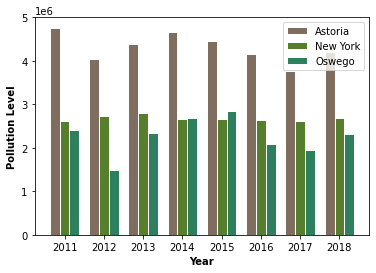

In [209]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = top_pollutors.iloc[0]
bars2 = top_pollutors.iloc[1]
bars3 = top_pollutors.iloc[2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Astoria')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='New York')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Oswego')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Pollution Level', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


$$Evaluation of Significance$$

In [22]:
## Find the standard deviation for 2010 and 2016
std_2010 = recycling_2010[["Capture Rate"]].std()
std_2016 = recycling_2016[["Capture Rate"]].std()

In [23]:
##Create the distributions for 2010 and 2016 
x_2010 = pd.DataFrame(np.random.normal(mean_2010,std_2010, size=1000))
y_2016 = pd.DataFrame(np.random.normal(mean_2016,std_2016, size=1000))
recycling_model = LinearRegression().fit(x_2010,y_2016)
print("the slope is: ", round(float(recycling_model.coef_),4))

the slope is:  0.0224


In [24]:
stats.ttest_ind(x_2010, y_2016)
print("The p-value is 0.139")
print("The test statistic is 1.477")

The p-value is 0.139
The test statistic is 1.477


In [97]:
pollution_bike_model = LinearRegression().fit(total_sums[['total_pollution']],total_sums[['biker_counts']])
pollution_bike_slope = pollution_bike_model.coef_[0][0]
pollution_bike_intercept = pollution_bike_model.intercept_[0]
pollution_bike_corr = pollution_bike_model.score(total_sums[['total_pollution']],total_sums[['biker_counts']])
print("The slope for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_slope))
print("The intercept for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_intercept))
print("The r squared value for total pollution levels in NYC vs. number of Citi bike trips is: {:.3f}".format(pollution_bike_corr))

The slope for total pollution levels in NYC vs. number of Citi bike trips is: -0.130
The intercept for total pollution levels in NYC vs. number of Citi bike trips is: 6096814.740
The r squared value for total pollution levels in NYC vs. number of Citi bike trips is: 0.737


In [107]:
train_set, test_set = train_test_split(ghg_ny, test_size = 0.20, random_state = 15)
print ("This is the training set for the NY pollution data: ", train_set)
print ("This is the test set for the NY pollution data: ", test_set)

This is the training set for the NY pollution data:       Unnamed: 0  facility_id        frs_id  \
71           71      1002160  110004541434   
31           31      1000771  110000582398   
138         138      1006042  110007384106   
151         151      1006910  110019768526   
120         120      1004894  110004513571   
..          ...          ...           ...   
156         156      1007087  110001595239   
128         128      1005360  110056973182   
119         119      1004818  110056972307   
133         133      1005849  110043970913   
140         140      1006276  110037939737   

                           facility_name           city state  zip_code  \
71               GUARDIAN INDUSTRIES LLC         GENEVA    NY     14456   
31                             Northport      NORTHPORT    NY     11768   
138        TGP Station 245 West Winfield  WEST WINFIELD    NY     13491   
151        OSWEGO CO ENERGY RECOVERY FAC         Fulton    NY     13069   
120    FULTON COUNT

In [111]:
pollution_model = LinearRegression().fit(train_set[["2011"]],train_set[["2016"]])
pollution_slope = pollution_model.coef_[0][0]
pollution_intercept = pollution_model.intercept_[0]
pollution_corr = pollution_model.score(train_set[["2011"]],train_set[["2016"]])
print("The slope for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_slope))
print("The intercept for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_intercept))
print("The r squared for NY pollution levels in 2011 vs. the pollution levels in 2016: {:.3f}".format(pollution_corr))

The slope for NY pollution levels in 2011 vs. the pollution levels in 2016: 0.659
The intercept for NY pollution levels in 2011 vs. the pollution levels in 2016: 46633.421
The r squared for NY pollution levels in 2011 vs. the pollution levels in 2016: 0.563


In [148]:
score_train = pollution_model.score(train_set[['2011']], train_set['2016'])
print("The percent accuracy of the training set is " + "{:.2%}".format(score_train))

The percent accuracy of the training set is 56.27%


In [149]:
score_test = pollution_model.score(test_set[['2011']], test_set['2016'])
print("The percent accuracy of the testing set is " + "{:.2%}".format(score_test))

The percent accuracy of the testing set is 80.29%


In [142]:
industry_lookup = pd.DataFrame({"cluster_label": [0, 1, 2],
                                        "predicted_industry": ["Power Plants", "Waste", "Other"]})
industry_lookup.head()

,cluster_label,predicted_industry
0,0,Power Plants
1,1,Waste
2,2,Other


In [143]:
industry_predict = pd.merge(ghg_ny, industry_lookup, on="cluster_label")
industry_predict.head()

,Unnamed: 0,facility_id,frs_id,facility_name,city,state,zip_code,address,county,latitude,...,2018,2017,2016,2015,2014,2013,2012,2011,cluster_label,predicted_industry
0,0,1000077,110000774797,REPUBLIC STEEL LACKAWANNA,BLASDELL,NY,14219,S3049 LAKESHORE RD.,ERIE COUNTY,42.80,...,78801.40,76235.01,61447.47,73193.02,77355.81,71702.38,80619.20,72355.73,0,Power Plants
1,1,1000093,110000324435,Momentive Performance Materials,WATERFORD,NY,12188,260 HUDSON RIVER ROAD,Saratoga,42.82,...,134663.45,131363.56,125491.33,126818.78,127808.87,132095.46,120944.74,142529.89,0,Power Plants
2,3,1000108,110012158707,North 1st,BROOKLYN,NY,11211,NORTH 1ST & 47-79 RIVER ST,Kings,40.72,...,31069.94,22460.32,26369.45,18559.93,20816.32,26629.45,26775.50,45473.83,0,Power Plants
3,4,1000111,110012158734,Vernon Boulevard,LONG ISLAND CITY,NY,11427,42 30 VERNON BLVD,Queens,40.75,...,35221.82,28073.30,28262.00,27000.90,26232.55,43133.84,38257.51,44820.68,0,Power Plants
4,5,1000112,110019827286,23rd and 3rd,BROOKLYN,NY,11232,730 3rd Avenue,Kings,40.66,...,70705.29,52698.66,66797.35,67399.25,40722.20,102599.22,68984.74,100591.83,0,Power Plants


In [150]:
num_correct = 0
for row in range(len(industry_predict)):
    if (industry_predict.iloc[row]['industry_sector'] == industry_predict.iloc[row]["predicted_industry"]):
        num_correct = num_correct + 1
accuracy = (num_correct/len(industry_predict))
print("The percent accuracy of predicting industry based on 2011 and 2016 pollution levels is: " + "{:.2%}".format(accuracy))

The percent accuracy of predicting industry based on 2011 and 2016 pollution levels is: 31.84%


$$Interpretations and Conclusion$$

$$Limitations$$